## **5.2 - Shallow RELU Neural Network**
This is a shallow neural network of 1 hidden layer with RELU as it's activation function.
- Based on exercise 5.2 from the *lecture notes addendum*.

### *DO NOT TOUCH*

In [2]:
import numpy as np

class ShallowRELU:
  def __init__(self, input_dim, hidden_dim, output_dim, learning_rate):
    self.input_dim = input_dim
    self.hidden_dim = hidden_dim
    self.output_dim = output_dim
    self.learning_rate = learning_rate

    self.W1 = np.array([[0.1, 0, 0.5], 
                        [0.7, -0.4, 0.2]])
    self.W2 = np.array([[1, 1, 0.5]]).T

  def relu(self, x):
    return np.maximum(0, x)
  
  def heaviside(self, x):
    return (x > 0).astype(x.dtype)
  
  def mse(self, y, y_pred):
    return ((y - y_pred) ** 2) /  (2 * y.shape[0])

  def forward(self, X):
    print("FORWARD PASS")
    print(f'Z1 = X @ W1: {X.shape} @ {self.W1.shape}')
    self.Z1 = X @ self.W1
    print(f'Z1: {self.Z1.shape}')

    print(f'A1 = relu(Z1): {self.Z1.shape}')
    self.A1 = self.relu(self.Z1)
    print(f'A1: {self.A1.shape}')

    print(f'Z2 = A1 @ W2: {self.A1.shape} @ {self.W2.shape}')
    self.Z2 = self.A1  @ self.W2
    print(f'Z2: {self.Z2.shape}')
    
    return self.Z2
  
  def backward(self, X, y):
    print("\n BACKWARD PASS")
    print(f'dZ2 = -(y - Z2): {y.shape} - {self.Z2.shape}')
    dZ2 = -(y - self.Z2)
    print(f'dZ2: {dZ2.shape}')

    print(f'dW2 = dZ2.T @ A1: {dZ2.T.shape} @ {self.A1.shape}')
    dW2 = dZ2.T @ self.A1
    print(f'dW2: {dW2.shape}')

    print(f'dA1 = W2 @ dZ2.T: {self.W2.shape} @ {dZ2.T.shape}')
    dA1 = self.W2 @ dZ2.T
    print(f'dA1: {dA1.shape}')

    print(f'dZ1 = heaviside(Z1).T * dA1: {self.heaviside(self.Z1).shape} * {dA1.shape}')
    dZ1 = self.heaviside(self.Z1).T * dA1
    print(f'dZ1: {dZ1.shape}')

    print(f'dW1 = dZ1 @ X: {dZ1.shape} @ {X.shape}')
    dW1 = dZ1 @ X
    print(f'dW1: {dW1.shape}')

    print(f'W1 -= learning_rate * dW1: {self.W1.shape} -= {self.learning_rate} * {dW1.T.shape}')
    self.W1 -= self.learning_rate * dW1.T

    print(f'W2 -= learning_rate * dW2: {self.W2.shape} -= {self.learning_rate} * {dW2.T.shape}')
    self.W2 -= self.learning_rate * dW2.T

    print(f'W1: {self.W1.shape}')
    print(f'W1: {self.W1}')
    print(f'W2: {self.W2.shape}')
    print(f'W2: {self.W2}')

  def train(self, X, y, epochs):
    for epoch in range(epochs):
      Z2 = self.forward(X)
      self.backward(X, y)
      print(f'\n Epoch {epoch + 1} - Loss: {self.mse(y, Z2)} \n')

X = np.array([[0.5, -0.25]])
y = np.array([[1]])

input_dim = 2
hidden_dim = 3
output_dim = 1
learning_rate = 1e-1

model = ShallowRELU(input_dim, hidden_dim, output_dim, learning_rate)
model.train(X, y, epochs=1)

FORWARD PASS
Z1 = X @ W1: (1, 2) @ (2, 3)
Z1: (1, 3)
A1 = relu(Z1): (1, 3)
A1: (1, 3)
Z2 = A1 @ W2: (1, 3) @ (3, 1)
Z2: (1, 1)

 BACKWARD PASS
dZ2 = -(y - Z2): (1, 1) - (1, 1)
dZ2: (1, 1)
dW2 = dZ2.T @ A1: (1, 1) @ (1, 3)
dW2: (1, 3)
dA1 = W2 @ dZ2.T: (3, 1) @ (1, 1)
dA1: (3, 1)
dZ1 = heaviside(Z1).T * dA1: (1, 3) * (3, 1)
dZ1: (3, 1)
dW1 = dZ1 @ X: (3, 1) @ (1, 2)
dW1: (3, 2)
W1 -= learning_rate * dW1: (2, 3) -= 0.1 * (2, 3)
W2 -= learning_rate * dW2: (3, 1) -= 0.1 * (3, 1)
W1: (2, 3)
W1: [[ 0.1   0.04  0.52]
 [ 0.7  -0.42  0.19]]
W2: (3, 1)
W2: [[1.   ]
 [1.008]
 [0.516]]

 Epoch 1 - Loss: [[0.32]] 



## **BONUS - Mini-Batch Shallow RELU Neural Network**
- Based on the last exercise from the *lecture notes addendum*
### *DO NOT TOUCH*

In [116]:
import numpy as np

class BatchShallowRELU:
  def __init__(self, input_dim, hidden_dim, output_dim, learning_rate, epochs, batch_size):
    self.input_dim = input_dim
    self.hidden_dim = hidden_dim
    self.output_dim = output_dim
    self.learning_rate = learning_rate

    self.W1 = np.array([[0.1, 0, 0.5], 
                        [0.7, -0.4, 0.2]])
    self.W2 = np.array([[1, 1, 0.5]]).T

  def relu(self, x):
    return np.maximum(0, x)
  
  def heaviside(self, x):
    return (x > 0).astype(x.dtype)
  
  def mse(self, y, y_pred):
    return ((y - y_pred) ** 2) /  (2 * y.shape[0])

  def forward(self, X):
    print("FORWARD PASS")
    print(f'Z1 = X @ W1: {X.shape} @ {self.W1.shape}')
    self.Z1 = X @ self.W1
    print(f'Z1: {self.Z1.shape}')

    print(f'A1 = relu(Z1): {self.Z1.shape}')
    self.A1 = self.relu(self.Z1)
    print(f'A1: {self.A1.shape}')

    print(f'Z2 = A1 @ W2: {self.A1.shape} @ {self.W2.shape}')
    self.Z2 = self.A1  @ self.W2
    print(f'Z2: {self.Z2.shape}')
    
    return self.Z2
  
  def backward(self, X, y):
    print("\n BACKWARD PASS")
    print(f'dZ2 = -(y - Z2): {y.shape} - {self.Z2.shape}')
    dZ2 = -(y - self.Z2)
    print(f'dZ2: {dZ2.shape}')

    print(f'dW2 = dZ2.T @ A1: {dZ2.T.shape} @ {self.A1.shape}')
    dW2 = dZ2.T @ self.A1
    print(f'dW2: {dW2.shape}')

    print(f'dA1 = W2 @ dZ2.T: {self.W2.shape} @ {dZ2.T.shape}')
    dA1 = self.W2 @ dZ2.T
    print(f'dA1: {dA1.shape}')

    print(f'dZ1 = heaviside(Z1).T * dA1: {self.heaviside(self.Z1).shape} * {dA1.shape}')
    dZ1 = self.heaviside(self.Z1).T * dA1
    print(f'dZ1: {dZ1.shape}')

    print(f'dW1 = dZ1 @ X: {dZ1.shape} @ {X.shape}')
    dW1 = dZ1 @ X
    print(f'dW1: {dW1.shape}')

    print(f'W1 -= learning_rate * dW1: {self.W1.shape} -= {self.learning_rate} * {dW1.T.shape}')
    self.W1 -= self.learning_rate * dW1.T

    print(f'W2 -= learning_rate * dW2: {self.W2.shape} -= {self.learning_rate} * {dW2.T.shape}')
    self.W2 -= self.learning_rate * dW2.T

    print(f'W1: {self.W1.shape}')
    print(f'W1: {self.W1}')
    print(f'W2: {self.W2.shape}')
    print(f'W2: {self.W2}')

  def train(self, X, y, epochs):
    for epoch in range(epochs):

      for i in range(0, len(X), batch_size):
        X_batch = X[i:i+batch_size]
        y_batch = y[i:i+batch_size]
        y_pred = self.forward(X_batch)
        self.backward(X_batch, y_batch)

      print(f'\n Epoch {epoch + 1} - Loss: {self.mse(y, y_pred)} \n')

X = np.array([[0.5, -0.25], 
              [0.8, 0.4]])
y = np.array([[1], 
              [1]])

learning_rate = 1e-1
batch_size = 2
epochs = 1
input_dim = 2
hidden_dim = 3
output_dim = 1

print(f'X: {X.shape}')
print(f'y: {y.shape}')

model = BatchShallowRELU(input_dim, hidden_dim, output_dim, learning_rate, epochs, batch_size)
model.train(X, y, epochs=1)

X: (2, 2)
y: (2, 1)
FORWARD PASS
Z1 = X @ W1: (2, 2) @ (2, 3)
Z1: (2, 3)
A1 = relu(Z1): (2, 3)
A1: (2, 3)
Z2 = A1 @ W2: (2, 3) @ (3, 1)
Z2: (2, 1)

 BACKWARD PASS
dZ2 = -(y - Z2): (2, 1) - (2, 1)
dZ2: (2, 1)
dW2 = dZ2.T @ A1: (1, 2) @ (2, 3)
dW2: (1, 3)
dA1 = W2 @ dZ2.T: (3, 1) @ (1, 2)
dA1: (3, 2)
dZ1 = heaviside(Z1).T * dA1: (2, 3) * (3, 2)
dZ1: (3, 2)
dW1 = dZ1 @ X: (3, 2) @ (2, 2)
dW1: (3, 2)
W1 -= learning_rate * dW1: (2, 3) -= 0.1 * (2, 3)
W2 -= learning_rate * dW2: (3, 1) -= 0.1 * (3, 1)
W1: (2, 3)
W1: [[ 0.132  0.04   0.536]
 [ 0.716 -0.42   0.198]]
W2: (3, 1)
W2: [[1.0144]
 [1.008 ]
 [0.5352]]

 Epoch 1 - Loss: [[0.16]
 [0.04]] 



## **Stochastic Gradient Descent Shallow RELU with MSE**

### *PUBLIC SCORE OF 0.01411 WITH THESE PARAMETERS:*
- learning_rate = 1e-14
- batch_size = 32
- epochs = 1000000
- input_dim = 2
- hidden_dim = 160
- output_dim = 1

> ===> Epoch [1000000/1000000], Loss (MSE) Train: 64.476326, RMSE Train: 8.029715, MSE Val: 23.268331, RMSE Val: 4.823726


Epoch [5000/1500000], Loss (MSE) Train: 1273.337541, RMSE Train: 35.683855, MSE Val: 306.744416, RMSE Val: 17.514120
Epoch [10000/1500000], Loss (MSE) Train: 439.797628, RMSE Train: 20.971353, MSE Val: 182.133990, RMSE Val: 13.495703
Epoch [15000/1500000], Loss (MSE) Train: 332.404720, RMSE Train: 18.231970, MSE Val: 153.495492, RMSE Val: 12.389330
Epoch [20000/1500000], Loss (MSE) Train: 295.624303, RMSE Train: 17.193729, MSE Val: 139.664684, RMSE Val: 11.817981
Epoch [25000/1500000], Loss (MSE) Train: 257.143126, RMSE Train: 16.035683, MSE Val: 131.730205, RMSE Val: 11.477378
Epoch [30000/1500000], Loss (MSE) Train: 237.770064, RMSE Train: 15.419795, MSE Val: 127.510544, RMSE Val: 11.292057
Epoch [35000/1500000], Loss (MSE) Train: 226.028090, RMSE Train: 15.034231, MSE Val: 125.105923, RMSE Val: 11.185076
Epoch [40000/1500000], Loss (MSE) Train: 214.273558, RMSE Train: 14.638086, MSE Val: 123.021740, RMSE Val: 11.091517
Epoch [45000/1500000], Loss (MSE) Train: 197.675482, RMSE Train:

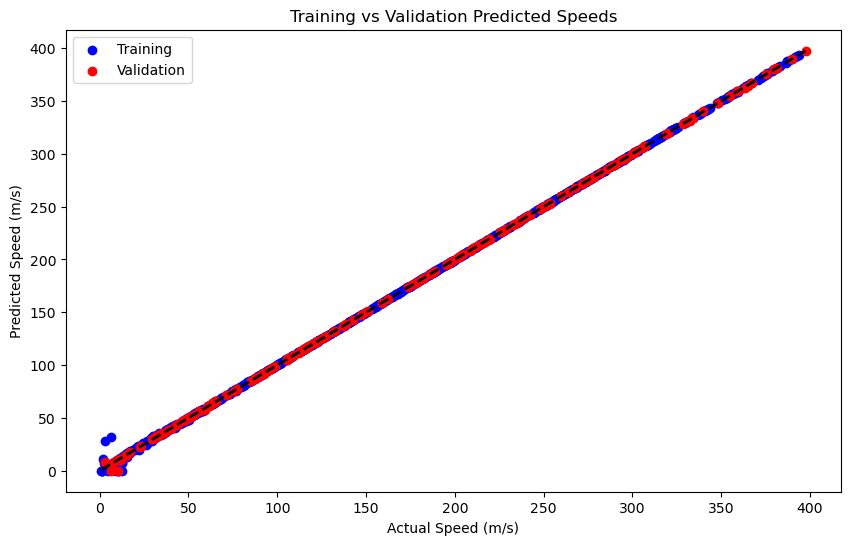

False


,id,expected
0,0,369.918824
1,1,31.467832
2,2,33.637292
3,3,43.459375
4,4,365.902996
5,5,175.403598
6,6,343.345553
7,7,159.954482
8,8,255.261873
9,9,300.335529


In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


class GDShallowRELU:
  def __init__(self, input_dim, hidden_dim, output_dim, learning_rate, SEED):
    self.input_dim = input_dim
    self.hidden_dim = hidden_dim
    self.output_dim = output_dim
    self.learning_rate = learning_rate

    np.random.seed(SEED) 
    self.W1 = np.random.uniform(-1, 1, (self.input_dim, self.hidden_dim))
    self.W2 = np.random.uniform(-1, 1, (self.hidden_dim, self.output_dim))

  def relu(self, x): #A ReLU definition that is compatible with numpy arrays
    return np.maximum(0, x)
  
  def heaviside(self, x): #The derivative of the ReLU used in backpropagation
    return (x > 0).astype(x.dtype)
  
  def mse(self, y, y_pred): #Manually defining the Mean Squared Error 
    return ((y - y_pred) ** 2) /  (2 * y.shape[0])

  def msre(self, y, y_pred): #Relative version of the Mean Squared Error
    return (((y - y_pred) / y) ** 2) /  (2 * y.shape[0])

  def forward(self, X):
    self.Z1 = X @ self.W1
    self.A1 = self.relu(self.Z1)
    self.Z2 = self.A1  @ self.W2
    return self.Z2
  
  def backward(self, X, y):
    #print(f'dZ2 = -(y - self.Z2): -{y.shape} - {self.Z2.shape}')
    dZ2 = -(y - self.Z2)
    #print(f'dZ2: {dZ2.shape} \n')

    #print(f'dW2 = dZ2.T @ self.A1: {dZ2.T.shape} @ {self.A1.shape}')
    dW2 = dZ2.T @ self.A1
    #print(f'dW2: {dW2.shape} \n')

    #print(f'dA1 = self.W2 @ dZ2.T: {self.W2.shape} @ {dZ2.T.shape}')
    dA1 = self.W2 @ dZ2.T
    #print(f'dA1: {dA1.shape} \n')

    #print(f'dZ1 = self.heaviside(self.Z1).T * dA1: {self.heaviside(self.Z1).T.shape} * {dA1.shape}')
    dZ1 = self.heaviside(self.Z1).T * dA1
    #print(f'dZ1: {dZ1.shape} \n')

    #print(f'dW1 = dZ1 @ X: {dZ1.shape} @ {X.shape}')
    dW1 = dZ1 @ X
    #print(f'dW1: {dW1.shape} \n \n')
    
    self.W1 -= self.learning_rate * dW1.T
    self.W2 -= self.learning_rate * dW2.T

  def train(self, X_train, y_train, X_val, y_val, epochs, batch_size):
    train_losses = []
    val_losses = []

    # Shuffle the training set
    permutation = np.random.permutation(len(X_train))
    X_train_shuffled = X_train[permutation]
    y_train_shuffled = y_train[permutation]

    for epoch in range(epochs):

      for i in range(0, len(X_train), batch_size):
        X_batch = X_train_shuffled[i:i+batch_size]
        y_batch = y_train_shuffled[i:i+batch_size]

        pred_batch = self.forward(X_batch)
        train_loss_batch = np.mean(self.mse(y_batch, pred_batch))
        train_losses.append(train_loss_batch)

        self.backward(X_batch, y_batch)

      val_pred_batch = self.forward(X_val)
      val_loss_batch = np.mean(self.mse(y_val, val_pred_batch))
      val_losses.append(val_loss_batch)
      
      if (epoch + 1) % 5000 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss (MSE) Train: {train_loss_batch:.6f}, RMSE Train: {np.sqrt(train_loss_batch):.6f}, MSE Val: {val_loss_batch:.6f}, RMSE Val: {np.sqrt(val_loss_batch):.6f}')

    return train_losses, val_losses


# Gravitational acceleration (m/s^2)
g = 9.80665  

SEED = 42

data = pd.read_csv("water_waves_training_data.csv")
h = data['height'].values
lambda_w = data['wave_length'].values
c = data['speed'].values

# Prepare the features based on c^2 = S(gh, g sqrt(h lambda))
X = np.vstack((g * h, g * np.sqrt(h * lambda_w))).T
y = c**2
y = y.reshape(-1, 1)  # Target is c^2

# Split the data into training and validation sets (80/20 split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=SEED)

learning_rate = 1e-14
batch_size = 32
epochs = 1500000
input_dim = 2
hidden_dim = 136
output_dim = 1


# Epoch [10000/10000], Loss (MSE) Train: 439.797628, RMSE Train: 20.971353, MSE Val: 182.133990, RMSE Val: 13.495703
# learning_rate = 1e-14
# batch_size = 32
# epochs = 10000
# input_dim = 2
# hidden_dim = 136
# output_dim = 1


model = GDShallowRELU(input_dim, hidden_dim, output_dim, learning_rate, SEED)
train_losses, val_losses = model.train(X_train, y_train, X_val, y_val, epochs, batch_size)

# Predictions and denormalization
y_pred_train = model.forward(X_train)
predicted_speeds_train = np.sqrt(np.maximum(y_pred_train.flatten(), 0))

y_pred_val = model.forward(X_val)
predicted_speeds_val = np.sqrt(np.maximum(y_pred_val.flatten(), 0))

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(np.sqrt(y_train), predicted_speeds_train, color='blue', label='Training')
plt.scatter(np.sqrt(y_val), predicted_speeds_val, color='red', label='Validation')
plt.plot([c.min(), c.max()], [c.min(), c.max()], 'k--', lw=2)
plt.xlabel('Actual Speed (m/s)')
plt.ylabel('Predicted Speed (m/s)')
plt.title('Training vs Validation Predicted Speeds')
plt.legend()
plt.show()

verification_data = pd.read_csv("water_waves_verification_data_input.csv")
h = verification_data.h.values
lam = verification_data.lam.values

X_verify = np.vstack((g * h, g * np.sqrt(h * lam))).T
y_verify = model.forward(X_verify)

expected_speed = model.forward(X_verify)

# Denormalize the expected speed
expected_speed = np.sqrt(np.maximum(expected_speed.flatten(), 0))

# Prepare the submission DataFrame
submission = pd.DataFrame({
    'id': verification_data['id'],
    'expected': expected_speed
})

# Check if submission has null values
print(submission.isnull().values.any())

# Print the submission DataFrame
submission[:10]

# *improved* Stochastic Gradient Descent with MSE 

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

class GDShallowRELU:
    def __init__(self, input_dim, hidden_dim, output_dim, learning_rate, SEED, momentum=0.9, l2_lambda=0.001):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.l2_lambda = l2_lambda

        np.random.seed(SEED)
        # He normal initialization
        self.W1 = np.random.randn(self.input_dim, self.hidden_dim) * np.sqrt(2. / self.input_dim)
        self.W2 = np.random.randn(self.hidden_dim, self.output_dim) * np.sqrt(2. / self.hidden_dim)

        # Initialize momentum terms
        self.vW1 = np.zeros_like(self.W1)
        self.vW2 = np.zeros_like(self.W2)

    def leaky_relu(self, x, alpha=0.01):
        return np.where(x > 0, x, alpha * x)
  
    def leaky_relu_derivative(self, x, alpha=0.01):
        return np.where(x > 0, 1, alpha)
  
    def mse(self, y, y_pred):
        return ((y - y_pred) ** 2) /  (2 * y.shape[0])

    def msre(self, y, y_pred):
        return (((y - y_pred) / y) ** 2) /  (2 * y.shape[0])

    def forward(self, X):
        self.Z1 = X @ self.W1
        self.A1 = self.leaky_relu(self.Z1)
        self.Z2 = self.A1 @ self.W2
        return self.Z2
  
    def backward(self, X, y):
        dZ2 = -(y - self.Z2)
        dW2 = (dZ2.T @ self.A1).T + self.l2_lambda * self.W2  # shape should match self.W2

        dA1 = dZ2 @ self.W2.T
        dZ1 = dA1 * self.leaky_relu_derivative(self.Z1)
        dW1 = X.T @ dZ1 + self.l2_lambda * self.W1  # shape should match self.W1

        # Update with momentum
        self.vW1 = self.momentum * self.vW1 + self.learning_rate * dW1
        self.W1 -= self.vW1
        
        self.vW2 = self.momentum * self.vW2 + self.learning_rate * dW2
        self.W2 -= self.vW2

    def train(self, X_train, y_train, X_val, y_val, epochs, batch_size):
        train_losses = []
        val_losses = []

        permutation = np.random.permutation(len(X_train))
        X_train_shuffled = X_train[permutation]
        y_train_shuffled = y_train[permutation]

        for epoch in range(epochs):

            for i in range(0, len(X_train), batch_size):
                X_batch = X_train_shuffled[i:i+batch_size]
                y_batch = y_train_shuffled[i:i+batch_size]

                pred_batch = self.forward(X_batch)
                train_loss_batch = np.mean(self.mse(y_batch, pred_batch))
                train_losses.append(train_loss_batch)

                self.backward(X_batch, y_batch)

            val_pred_batch = self.forward(X_val)
            val_loss_batch = np.mean(self.mse(y_val, val_pred_batch))
            val_losses.append(val_loss_batch)
            
            if (epoch + 1) % 500 == 0:
                print(f'Epoch [{epoch + 1}/{epochs}], Loss (MSE) Train: {train_loss_batch:.6f}, RMSE Train: {np.sqrt(train_loss_batch):.6f}, MSE Val: {val_loss_batch:.6f}, RMSE Val: {np.sqrt(val_loss_batch):.6f}')

        return train_losses, val_losses

# Constants
g = 9.80665
SEED = 42

# Load data
data = pd.read_csv("water_waves_training_data.csv")
h = data['height'].values
lambda_w = data['wave_length'].values
c = data['speed'].values

# Prepare the features based on c^2 = S(gh, g sqrt(h lambda))
X = np.vstack((g * h, g * np.sqrt(h * lambda_w))).T
y = c**2
y = y.reshape(-1, 1)

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Epoch [10000/10000], Loss (MSE) Train: 895.895547, RMSE Train: 29.931514, MSE Val: 164.745200, RMSE Val: 12.835311
# learning_rate = 1e-15
# batch_size = 32
# epochs = 10000
# input_dim = 2
# hidden_dim = 200
# output_dim = 1

# Model parameters
learning_rate = 1e-14
batch_size = 8
epochs = 10000
input_dim = 2
hidden_dim = 5
output_dim = 1

# Train model
model = GDShallowRELU(input_dim, hidden_dim, output_dim, learning_rate, SEED, momentum=0.9, l2_lambda=0.001)
train_losses, val_losses = model.train(X_train, y_train, X_val, y_val, epochs, batch_size)

# Predictions and visualization
y_pred_train = model.forward(X_train)
predicted_speeds_train = np.sqrt(np.maximum(y_pred_train.flatten(), 0))

y_pred_val = model.forward(X_val)
predicted_speeds_val = np.sqrt(np.maximum(y_pred_val.flatten(), 0))

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(np.sqrt(y_train), predicted_speeds_train, color='blue', label='Training')
plt.scatter(np.sqrt(y_val), predicted_speeds_val, color='red', label='Validation')
plt.plot([c.min(), c.max()], [c.min(), c.max()], 'k--', lw=2)
plt.xlabel('Actual Speed (m/s)')
plt.ylabel('Predicted Speed (m/s)')
plt.title('Training vs Validation Predicted Speeds')
plt.legend()
plt.show()

# Load verification data
verification_data = pd.read_csv("water_waves_verification_data_input.csv")
h = verification_data.h.values
lam = verification_data.lam.values

X_verify = np.vstack((g * h, g * np.sqrt(h * lam))).T
y_verify = model.forward(X_verify)

expected_speed = model.forward(X_verify)
expected_speed = np.sqrt(np.maximum(expected_speed.flatten(), 0))

# Prepare and check submission
submission = pd.DataFrame({
    'id': verification_data['id'],
    'expected': expected_speed
})

print(submission.isnull().values.any())
print(submission[:10])

Epoch [500/10000], Loss (MSE) Train: 2022121.169512, RMSE Train: 1422.013069, MSE Val: 34332.937054, RMSE Val: 185.291492
Epoch [1000/10000], Loss (MSE) Train: 79523.478392, RMSE Train: 281.999075, MSE Val: 6419.204957, RMSE Val: 80.119941
Epoch [1500/10000], Loss (MSE) Train: 104471.025814, RMSE Train: 323.219779, MSE Val: 5795.383846, RMSE Val: 76.127418
Epoch [2000/10000], Loss (MSE) Train: 124079.907872, RMSE Train: 352.249781, MSE Val: 5858.088995, RMSE Val: 76.538154
Epoch [2500/10000], Loss (MSE) Train: 124908.942444, RMSE Train: 353.424592, MSE Val: 5856.744420, RMSE Val: 76.529370
Epoch [3000/10000], Loss (MSE) Train: 124868.190407, RMSE Train: 353.366935, MSE Val: 5855.844936, RMSE Val: 76.523493
Epoch [3500/10000], Loss (MSE) Train: 124878.894833, RMSE Train: 353.382081, MSE Val: 5861.286127, RMSE Val: 76.559037
Epoch [4000/10000], Loss (MSE) Train: 124924.264321, RMSE Train: 353.446268, MSE Val: 5861.066664, RMSE Val: 76.557604
Epoch [4500/10000], Loss (MSE) Train: 124991.4

KeyboardInterrupt: 

In [30]:
submission.to_csv('submission_v5.csv', index=False)



## **Stochastic Gradient Descent Shallow RELU with MSRE**

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

class miniBatchShallowRELU:
  def __init__(self, input_dim, hidden_dim, output_dim, learning_rate, SEED):
    self.input_dim = input_dim
    self.hidden_dim = hidden_dim
    self.output_dim = output_dim
    self.learning_rate = learning_rate

    np.random.seed(SEED)
    self.W1 = np.random.uniform(-1, 1, (self.input_dim, self.hidden_dim))
    self.W2 = np.random.uniform(-1, 1, (self.hidden_dim, self.output_dim))

  def relu(self, x):
    return np.maximum(0, x)
  
  def heaviside(self, x):
    return (x > 0).astype(x.dtype)
  
  def mse(self, y, y_pred):
    return ((y - y_pred) ** 2) /  (2 * y.shape[0])

  def msre(self, y, y_pred):
    return (((y - y_pred) / y) ** 2) /  (2 * y.shape[0])

  def forward(self, X):
    self.Z1 = X @ self.W1
    self.A1 = self.relu(self.Z1)
    self.Z2 = self.A1  @ self.W2
    return self.Z2
  
  def backward(self, X, y):
    dZ2 = -((y - self.Z2)/(y ** 2))
    dW2 = dZ2.T @ self.A1
    dA1 = self.W2 @ dZ2.T
    dZ1 = self.heaviside(self.Z1).T * dA1
    dW1 = dZ1 @ X

    self.W1 -= self.learning_rate * dW1.T
    self.W2 -= self.learning_rate * dW2.T

  def train(self, X_train, y_train, X_val, y_val, epochs, batch_size):
    train_losses = []
    val_losses = []

    # Shuffle the training set
    permutation = np.random.permutation(len(X_train))
    X_train_shuffled = X_train[permutation]
    y_train_shuffled = y_train[permutation]

    for epoch in range(epochs):

      for i in range(0, len(X_train), batch_size):
        X_batch = X_train_shuffled[i:i+batch_size]
        y_batch = y_train_shuffled[i:i+batch_size]

        Z2_batch = self.forward(X_batch)
        train_loss_batch = np.mean(self.msre(y_batch, Z2_batch))
        train_losses.append(train_loss_batch)

        self.backward(X_batch, y_batch)

      val_pred_batch = self.forward(X_val)
      val_loss_batch = np.mean(self.msre(y_val, val_pred_batch))
      val_losses.append(val_loss_batch)
      
      if (epoch + 1) % 500 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss (MSRE) Train: {train_loss_batch:.6f}, RMSRE Train: {np.sqrt(train_loss_batch):.6f}, MSRE Val: {val_loss_batch:.6f}, RMSRE Val: {np.sqrt(val_loss_batch):.6f}')

    return train_losses, val_losses


# Gravitational acceleration (m/s^2)
g = 9.80665  

data = pd.read_csv("water_waves_training_data.csv")
h = data['height'].values
lam = data['wave_length'].values
c = data['speed'].values

# Prepare the features based on c^2 = S(gh, g sqrt(h lambda))
X = np.vstack((g * h, g * np.sqrt(h * lam))).T
y = c**2 # Target is c^
y = y.reshape(-1, 1) # Create a column vector

# Split the data into training and validation sets (80/20 split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

learning_rate = 1e-7
batch_size = 8
epochs = 100000
input_dim = 2
hidden_dim = 2
output_dim = 1
SEED = 42

model = miniBatchShallowRELU(input_dim, hidden_dim, output_dim, learning_rate, SEED)
train_losses, val_losses = model.train(X_train, y_train, X_val, y_val, epochs, batch_size)

# Predictions and denormalization
y_pred_train = model.forward(X_train)
predicted_speeds_train = np.sqrt(np.maximum(y_pred_train.flatten(), 0))

y_pred_val = model.forward(X_val)
predicted_speeds_val = np.sqrt(np.maximum(y_pred_val.flatten(), 0))

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(np.sqrt(y_train), predicted_speeds_train, color='blue', label='Training')
plt.scatter(np.sqrt(y_val), predicted_speeds_val, color='red', label='Validation')
plt.plot([c.min(), c.max()], [c.min(), c.max()], 'k--', lw=2)
plt.xlabel('Actual Speed (m/s)')
plt.ylabel('Predicted Speed (m/s)')
plt.title('Training vs Validation Predicted Speeds')
plt.legend()
plt.show()

verification_data = pd.read_csv("water_waves_verification_data_input.csv")
h = verification_data.h.values
lam = verification_data.lam.values

X_verify = np.vstack((g * h, g * np.sqrt(h * lam))).T
y_verify = model.forward(X_verify)

expected_speed = model.forward(X_verify)

# Denormalize the expected speed
expected_speed = np.sqrt(np.maximum(expected_speed.flatten(), 0))

# Prepare the submission DataFrame
submission = pd.DataFrame({
    'id': verification_data['id'],
    'expected': expected_speed
})

# Check if submission has null values
print(submission.isnull().values.any())

# Print the submission DataFrame
submission[:10]

Epoch [500/100000], Loss (MSRE) Train: 0.018144, RMSRE Train: 0.134700, MSRE Val: 0.001097, RMSRE Val: 0.033116
Epoch [1000/100000], Loss (MSRE) Train: 0.016873, RMSRE Train: 0.129896, MSRE Val: 0.001034, RMSRE Val: 0.032162
Epoch [1500/100000], Loss (MSRE) Train: 0.015836, RMSRE Train: 0.125842, MSRE Val: 0.000990, RMSRE Val: 0.031465
Epoch [2000/100000], Loss (MSRE) Train: 0.015014, RMSRE Train: 0.122531, MSRE Val: 0.000946, RMSRE Val: 0.030757
Epoch [2500/100000], Loss (MSRE) Train: 0.014196, RMSRE Train: 0.119146, MSRE Val: 0.000907, RMSRE Val: 0.030117
Epoch [3000/100000], Loss (MSRE) Train: 0.013434, RMSRE Train: 0.115903, MSRE Val: 0.000874, RMSRE Val: 0.029567
Epoch [3500/100000], Loss (MSRE) Train: 0.012824, RMSRE Train: 0.113243, MSRE Val: 0.000846, RMSRE Val: 0.029078
Epoch [4000/100000], Loss (MSRE) Train: 0.012394, RMSRE Train: 0.111328, MSRE Val: 0.000818, RMSRE Val: 0.028607
Epoch [4500/100000], Loss (MSRE) Train: 0.012026, RMSRE Train: 0.109663, MSRE Val: 0.000792, RMSR

KeyboardInterrupt: 

In [47]:
#saubmission.to_csv('submission.csv', index=False)

## Deep Stochastic Gradient Descent

Epoch [500/10000], Loss (MSRE) Train: 32714.456594, RMSRE Train: 180.871381, MSRE Val: 3508.127107, RMRSE Val: 59.229445
Epoch [1000/10000], Loss (MSRE) Train: 22741.742189, RMSRE Train: 150.803654, MSRE Val: 2508.586682, RMRSE Val: 50.085793
Epoch [1500/10000], Loss (MSRE) Train: 17363.600917, RMSRE Train: 131.771017, MSRE Val: 1882.206421, RMRSE Val: 43.384403
Epoch [2000/10000], Loss (MSRE) Train: 10800.450020, RMSRE Train: 103.925214, MSRE Val: 1604.298980, RMRSE Val: 40.053701
Epoch [2500/10000], Loss (MSRE) Train: 9246.049870, RMSRE Train: 96.156382, MSRE Val: 1387.824300, RMRSE Val: 37.253514
Epoch [3000/10000], Loss (MSRE) Train: 9123.298587, RMSRE Train: 95.515960, MSRE Val: 1207.500226, RMRSE Val: 34.749104
Epoch [3500/10000], Loss (MSRE) Train: 10903.086181, RMSRE Train: 104.417844, MSRE Val: 977.232235, RMRSE Val: 31.260714
Epoch [4000/10000], Loss (MSRE) Train: 9652.096866, RMSRE Train: 98.245086, MSRE Val: 845.413266, RMRSE Val: 29.075991
Epoch [4500/10000], Loss (MSRE) T

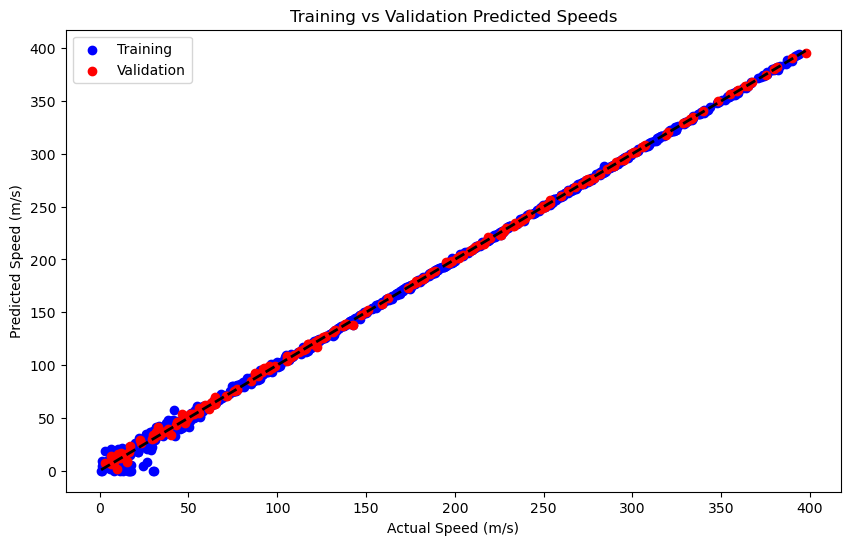

False


,id,expected
0,0,369.420098
1,1,36.350845
2,2,31.680887
3,3,47.961025
4,4,367.325339
5,5,176.600204
6,6,342.934870
7,7,160.939558
8,8,256.063015
9,9,299.536235


In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

class GDShallowRELU:
  def __init__(self, input_dim, hidden_dim, output_dim, learning_rate, SEED):
    self.input_dim = input_dim
    self.hidden_dim = hidden_dim
    self.output_dim = output_dim
    self.learning_rate = learning_rate

    np.random.seed(SEED)
    self.W1 = np.random.uniform(-1, 1, (self.input_dim, self.hidden_dim[0]))
    self.W2 = np.random.uniform(-1, 1, (self.hidden_dim[0], self.hidden_dim[1]))
    self.W3 = np.random.uniform(-1, 1, (self.hidden_dim[1], self.output_dim))

  def relu(self, x):
    return np.maximum(0, x)
  
  def heaviside(self, x):
    return (x > 0).astype(x.dtype)
  
  def mse(self, y, y_pred):
    return ((y - y_pred) ** 2) /  (2 * y.shape[0])

  def msre(self, y, y_pred):
    return (((y - y_pred) / y) ** 2) /  (2 * y.shape[0])

  def forward(self, X):
    self.Z1 = X @ self.W1
    self.A1 = self.relu(self.Z1)
    self.Z2 = self.A1  @ self.W2
    self.A2 = self.relu(self.Z2)
    self.Z3 = self.A2 @ self.W3
    return self.Z3
  
  def backward(self, X, y):
    #print(f'dZ3 = -(y - self.Z3): -{y.shape} - {self.Z3.shape}')
    dZ3 = -(y - self.Z3)
    #print(f'dZ2: {dZ3.shape} \n')

    #print(f'dW3 = dZ3.T @ self.A2: {dZ3.T.shape} @ {self.A2.shape}')
    dW3 = dZ3.T @ self.A2
    #print(f'dW3: {dW3.shape} \n')

    #print(f'dA2 = self.W3 @ dZ3.T: {self.W3.shape} @ {dZ3.T.shape}')
    dA2 = self.W3 @ dZ3.T
    #print(f'dA2: {dA2.shape} \n')

    #print(f'dZ2 = self.heaviside(self.Z2).T * dA2: {self.heaviside(self.Z2).T.shape} * {dA2.shape}')
    dZ2 = self.heaviside(self.Z2).T * dA2
    #print(f'dZ2: {dZ2.shape} \n')

    #print(f'dW2 = dZ2 @ X: {dZ2.shape} @ {self.A1.shape}')
    dW2 = dZ2 @ self.A1
    #print(f'dW2: {dW2.shape} \n')

    #print(f'dA1 = self.W2 @ dZ2: {self.W2.shape} @ {dZ2.shape}')
    dA1 = self.W2 @ dZ2
    #print(f'dA1: {dA1.shape} \n')

    #print(f'self.heaviside(self.Z1).T * dA1: {self.heaviside(self.Z1).T.shape} * {dA1.shape}')
    dZ1 = self.heaviside(self.Z1).T * dA1
    #print(f'dZ1: {dZ1.shape} \n')

    #print(f'dZ1 @ X: {dZ1.shape} @ {X.shape}')
    dW1 = dZ1 @ X
    #print(f'dW1: {dW1.shape} \n \n')

    
    self.W1 -= self.learning_rate * dW1.T
    self.W2 -= self.learning_rate * dW2.T
    self.W3 -= self.learning_rate * dW3.T



  def train(self, X_train, y_train, X_val, y_val, epochs, batch_size):
    train_losses = []
    val_losses = []

    # Shuffle the training set
    permutation = np.random.permutation(len(X_train))
    X_train_shuffled = X_train[permutation]
    y_train_shuffled = y_train[permutation]

    for epoch in range(epochs):

      for i in range(0, len(X_train), batch_size):
        X_batch = X_train_shuffled[i:i+batch_size]
        y_batch = y_train_shuffled[i:i+batch_size]

        pred_batch = self.forward(X_batch)
        train_loss_batch = np.mean(self.mse(y_batch, pred_batch))
        train_losses.append(train_loss_batch)

        self.backward(X_batch, y_batch)

      val_pred_batch = self.forward(X_val)
      val_loss_batch = np.mean(self.mse(y_val, val_pred_batch))
      val_losses.append(val_loss_batch)
      
      if (epoch + 1) % 500 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss (MSRE) Train: {train_loss_batch:.6f}, RMSRE Train: {np.sqrt(train_loss_batch):.6f}, MSRE Val: {val_loss_batch:.6f}, RMRSE Val: {np.sqrt(val_loss_batch):.6f}')

    return train_losses, val_losses


# Gravitational acceleration (m/s^2)
g = 9.80665  

SEED = 42

data = pd.read_csv("water_waves_training_data.csv")
h = data['height'].values
lambda_w = data['wave_length'].values
c = data['speed'].values

# Prepare the features based on c^2 = S(gh, g sqrt(h lambda))
X = np.vstack((g * h, g * np.sqrt(h * lambda_w))).T
y = c**2
y = y.reshape(-1, 1)  # Target is c^2

# Split the data into training and validation sets (80/20 split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Epoch [10000/10000], Loss (MSE) Train: 5203.583214, RMSE Train: 72.135866, MSE Val: 493.112361, RMSE Val: 22.206133
# learning_rate = 1e-14
# batch_size = 26
# epochs = 10000
# input_dim = 2
# hidden_dim = [32,16]
# output_dim = 1

learning_rate = 1e-14
batch_size = 26
epochs = 10000
input_dim = 2
hidden_dim = [32, 16]
output_dim = 1


model = GDShallowRELU(input_dim, hidden_dim, output_dim, learning_rate, SEED)
train_losses, val_losses = model.train(X_train, y_train, X_val, y_val, epochs, batch_size)

# Predictions and denormalization
y_pred_train = model.forward(X_train)
predicted_speeds_train = np.sqrt(np.maximum(y_pred_train.flatten(), 0))

y_pred_val = model.forward(X_val)
predicted_speeds_val = np.sqrt(np.maximum(y_pred_val.flatten(), 0))

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(np.sqrt(y_train), predicted_speeds_train, color='blue', label='Training')
plt.scatter(np.sqrt(y_val), predicted_speeds_val, color='red', label='Validation')
plt.plot([c.min(), c.max()], [c.min(), c.max()], 'k--', lw=2)
plt.xlabel('Actual Speed (m/s)')
plt.ylabel('Predicted Speed (m/s)')
plt.title('Training vs Validation Predicted Speeds')
plt.legend()
plt.show()

verification_data = pd.read_csv("water_waves_verification_data_input.csv")
h = verification_data.h.values
lam = verification_data.lam.values

X_verify = np.vstack((g * h, g * np.sqrt(h * lam))).T
y_verify = model.forward(X_verify)

expected_speed = model.forward(X_verify)

# Denormalize the expected speed
expected_speed = np.sqrt(np.maximum(expected_speed.flatten(), 0))

# Prepare the submission DataFrame
submission = pd.DataFrame({
    'id': verification_data['id'],
    'expected': expected_speed
})

# Check if submission has null values
print(submission.isnull().values.any())

# Print the submission DataFrame
submission[:10]

In [206]:
# Save the submission DataFrame
submission.to_csv('submission_v4.csv', index=False)

# RMSRE Val: 0.008255 gave us a score of 0.15993
# learning_rate = 1e-6
# batch_size = 8
# epochs = 100000
# input_dim = 2
# hidden_dim = 256